In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
%matplotlib inline

In [161]:
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)


In [162]:
df = pd.read_csv('/home/calum/Documents/MPhysProj/r_cluster_analysis/reduced_mgs_with_clusters.csv')
df.head(n=4)

,Unnamed: 0,Mr,z,SFR,Colours,grp_out.cluster.o.
0,1,17.637011,0.079803,2.450100e+06,2.399015,1
1,4,15.997839,0.033230,1.807197e+06,1.740541,1
2,5,17.458405,0.067888,3.292275e+06,1.541874,1
3,10,16.321009,0.029620,1.724056e+06,2.447550,1


In [163]:
cluster_one = df.loc[df['grp_out.cluster.o.'] == 1] 
cluster_two = df.loc[df['grp_out.cluster.o.'] == 2]

In [164]:
array = np.load('/home/calum/Documents/MPhysProj/data/contour_plot.npy')
x = array[0]
y = array[1]

In [165]:
def plot_contour(x_contour,y_contour,x,y):            
   # start with a rectangular figure
    plt.figure(figsize=(20,10))
    ax = plt.axes()
    
    # now let's overplot some contours. First we have to make a 2d
    # histogram of the point distribution.
    vals, xedges, yedges = np.histogram2d(x_contour, y_contour, bins=150)
    # for scaling
    tvals, txedges, tyedges = np.histogram2d(x, y, bins=30)
       
    # Now we have the bin edges, but we want to find the bin centres to
    # plot the contour positions - they're half way between the edges:
    xbins = 0.5 * (xedges[:-1] + xedges[1:])
    ybins = 0.5 * (yedges[:-1] + yedges[1:])
    
    # Now we have the bin edges, but we want to find the bin centres to
    # plot the contour positions - they're half way between the edges:
    txbins = 0.5 * (txedges[:-1] + txedges[1:])
    tybins = 0.5 * (tyedges[:-1] + tyedges[1:])
           
    # now plot the contours
    ax.contourf(xbins, ybins, vals.T, 20, zorder=10)
    #ax.contour(txbins, tybins, tvals.T, 20, colors='k', zorder=10)
    ax.set_xlim([-23,-16])
    ax.set_ylim([0,3.5])
    ax.set_xlabel('M r,petro')
    ax.set_ylabel('(u-r)model')
    title_str = 'Observed bivariate distribution of the sample in rest-frame color vs. \
    absolute magnitude. Sample size '+str(len(x_contour))+' galaxies. Colour plot 150 bins, Contour 30 bins.'
    ax.set_title(title_str)    
    plt.draw()
    plt.savefig('name.png')

In [166]:
z = cluster_one['z'].values
y_raw = cluster_one['Colours'].values
x1 = []
y1 = []

In [167]:
for i,x_val in enumerate(x_raw):
    if z[i] > 0:
        x1.append(float(x_val)-5*(math.log(cosmo.luminosity_distance(z[i]).to(u.pc).value/10 ,10)))
        y1.append(y_raw[i])

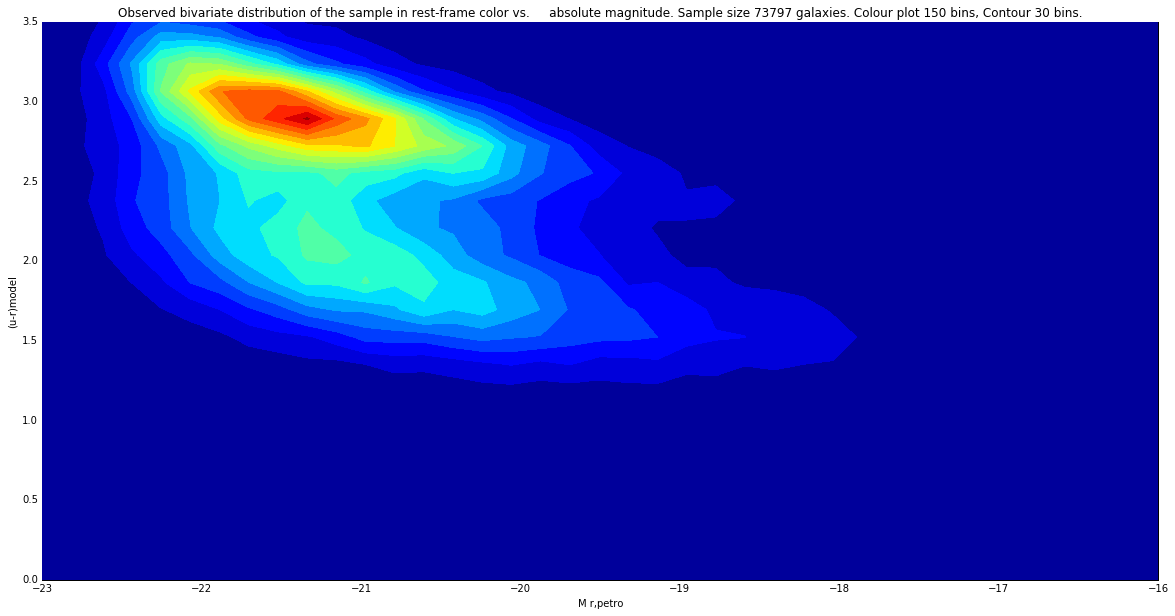

In [168]:
plot_contour(x1,y1,x,y)

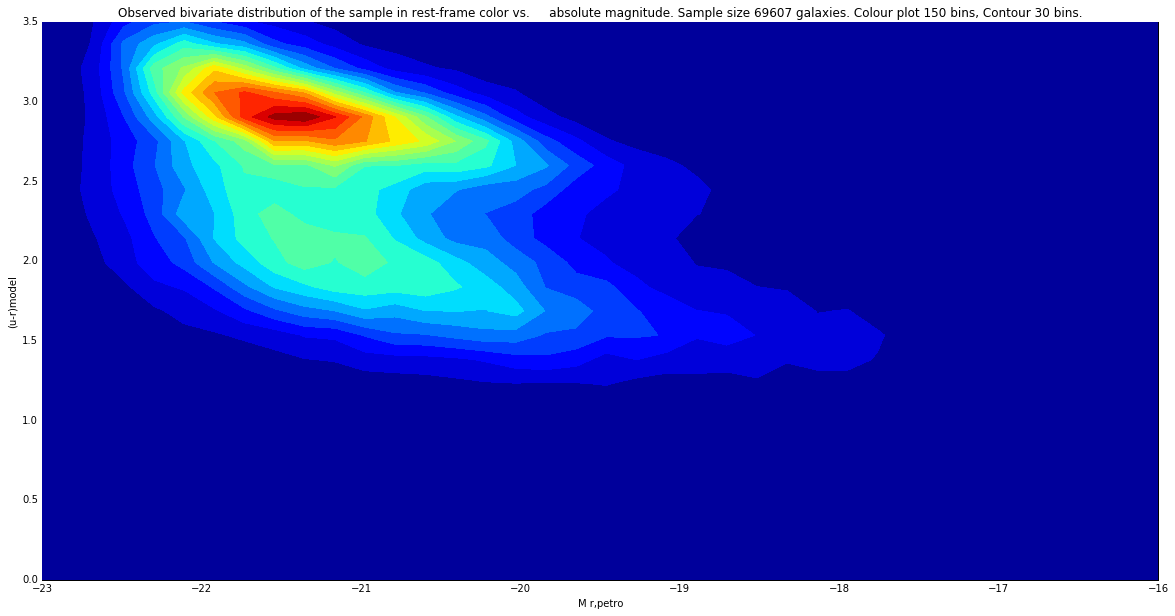

In [169]:
x_raw = cluster_two['Mr'].values
z = cluster_two['z'].values
y_raw = cluster_two['Colours'].values
x2 = []
y2 = []

for i,x_val in enumerate(x_raw):
    if z[i] > 0:
        x2.append(float(x_val)-5*(math.log(cosmo.luminosity_distance(z[i]).to(u.pc).value/10 ,10)))
        y2.append(y_raw[i])
        
plot_contour(x2,y2,x,y)

In [170]:
def plot_hist(array):
    weights = np.ones_like(array)/len(array)
    n, bins, patches = plt.hist(array,bins=100,weights=weights)
    plt.close()
    return n, bins

In [171]:
plt.figure()
n1, bins = plot_hist(y1) 
n2, bins = plot_hist(y2) 

(0, 5)

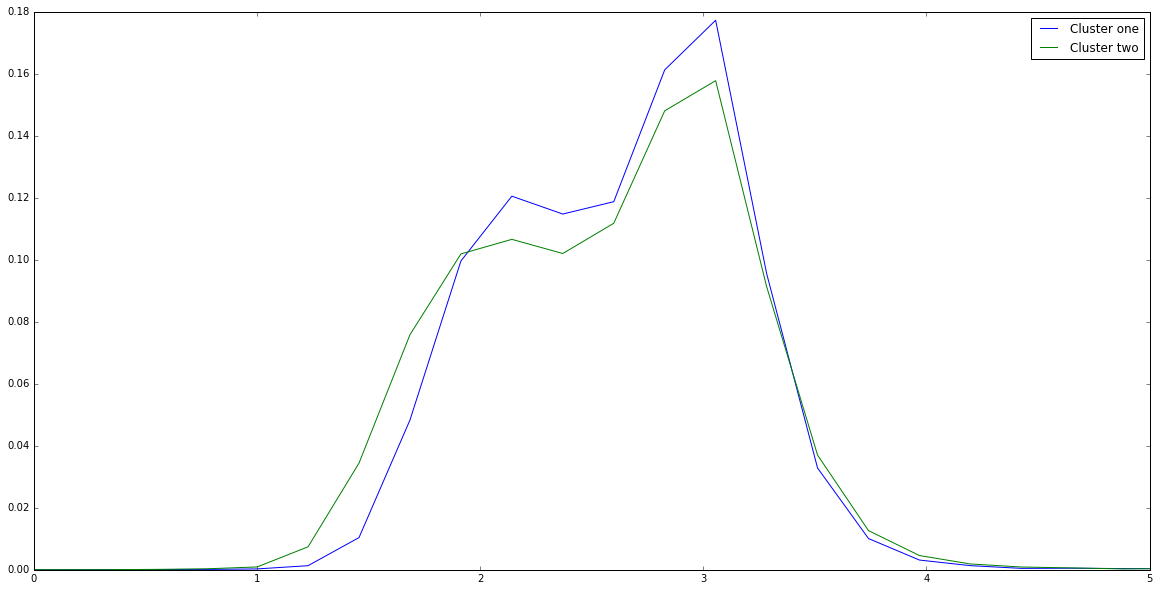

In [172]:
plt.figure(figsize=(20,10))
plt.plot(bins[1:],n1,label='Cluster one')
plt.plot(bins[1:],n2,label='Cluster two')
plt.legend()
plt.xlim(0,5)

(array([  9.31273706e-01,   3.79922468e-02,   1.53112450e-02, ...,
          0.00000000e+00,   0.00000000e+00,   6.97233378e-06]),
 array([  0.00000000e+00,   1.65457383e+08,   3.30914765e+08, ...,
          1.65424291e+12,   1.65440837e+12,   1.65457383e+12]),
 <a list of 10000 Patch objects>)

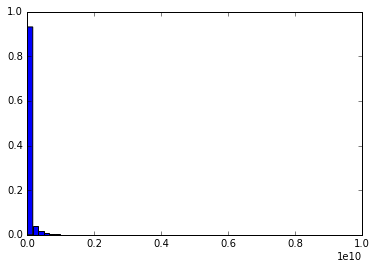

In [151]:
sfr_array = df['SFR'].values
weights = np.ones_like(sfr_array)/len(sfr_array)
plt.figure()
plt.xlim(0,math.pow(10,10))
plt.hist(sfr_array,bins=10000, weights=weights)

In [152]:
df = pd.read_csv('/home/calum/Documents/MPhysProj/r_cluster_analysis/reduced_mgs_with_clusters.csv')
df.head(n=4)

,Unnamed: 0,Mr,z,SFR,Colours,grp_out.cluster.o.
0,1,17.637011,0.079803,2.450100e+06,2.399015,1
1,4,15.997839,0.033230,1.807197e+06,1.740541,1
2,5,17.458405,0.067888,3.292275e+06,1.541874,1
3,10,16.321009,0.029620,1.724056e+06,2.447550,1


In [153]:
cluster_one = df.loc[df['grp_out.cluster.o.'] == 1] 
cluster_two = df.loc[df['grp_out.cluster.o.'] == 2]

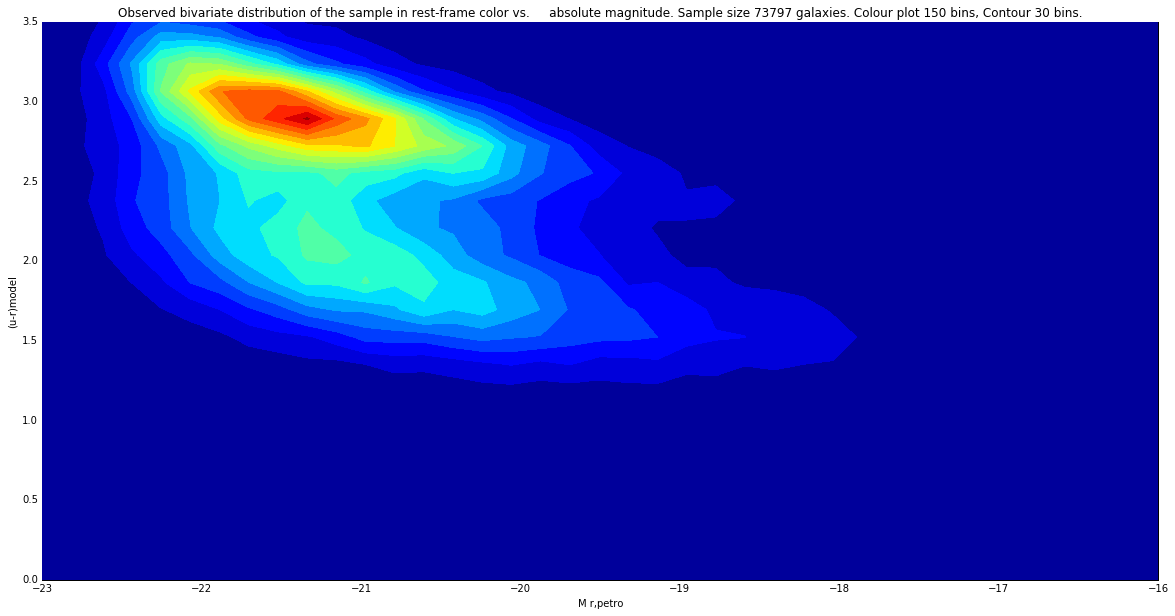

In [155]:
x_raw = cluster_one['Mr'].values
z = cluster_one['z'].values
y_raw = cluster_one['Colours'].values
x1 = []
y1 = []

for i,x_val in enumerate(x_raw):
    if z[i] > 0:
        x1.append(float(x_val)-5*(math.log(cosmo.luminosity_distance(z[i]).to(u.pc).value/10 ,10)))
        y1.append(y_raw[i])
        
plot_contour(x1,y1,x,y)

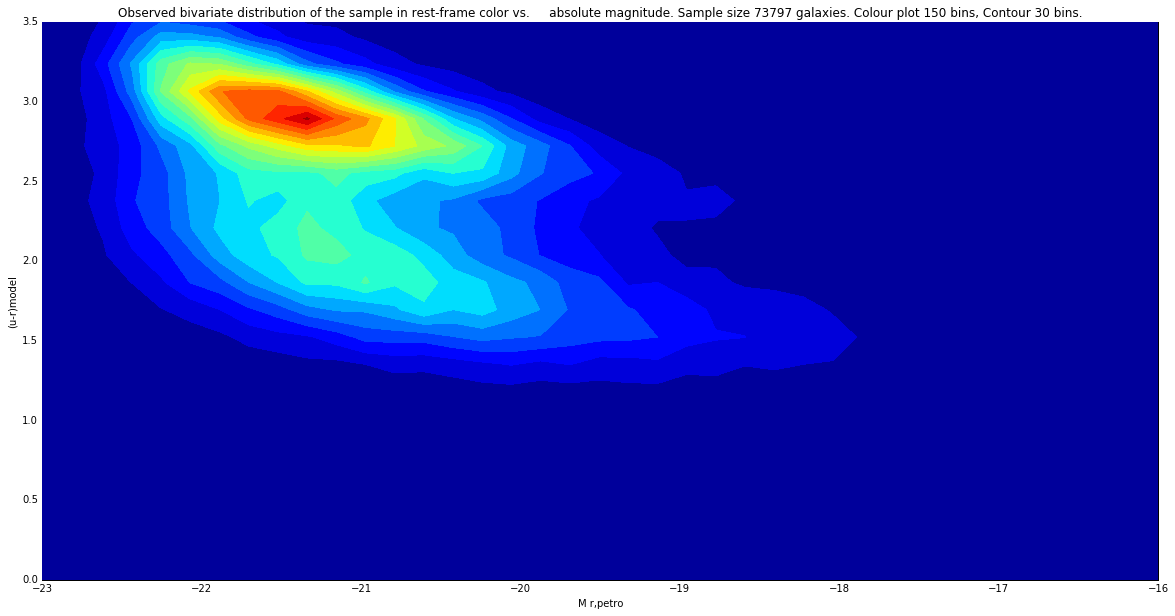

In [156]:
x_raw = cluster_one['Mr'].values
z = cluster_one['z'].values
y_raw = cluster_one['Colours'].values
x2 = []
y2 = []

for i,x_val in enumerate(x_raw):
    if z[i] > 0:
        x2.append(float(x_val)-5*(math.log(cosmo.luminosity_distance(z[i]).to(u.pc).value/10 ,10)))
        y2.append(y_raw[i])
        
plot_contour(x2,y2,x,y)

In [157]:
plt.figure()
n1, bins = plot_hist(y1) 
n2, bins = plot_hist(y2)

(0, 5)

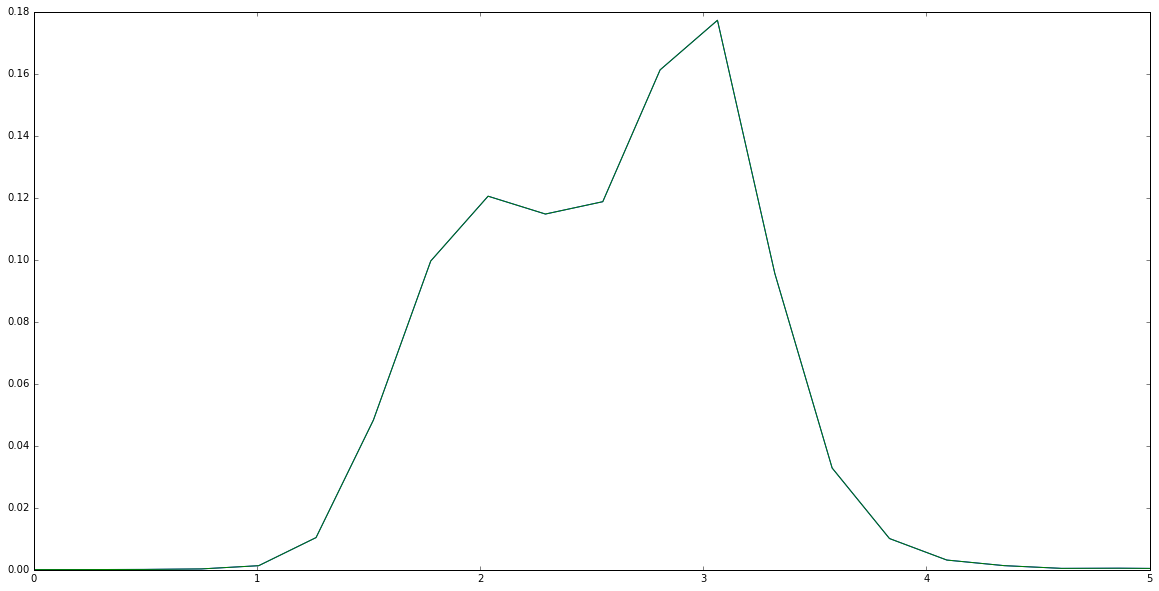

In [158]:
plt.figure(figsize=(20,10))
plt.plot(bins[1:],n1,label='Full sample')
plt.plot(bins[1:],n2,label='0.1 SMF')
plt.xlim(0,5)